# Data Visualization Notebook

## 🎯 Objective
The goal of this notebook is to perform exploratory data analysis (EDA) on the cherry leaf dataset in order to:

 - Understand the distribution and structure of the image data
 - Identify class imbalances or irregularities
 - Visually explore key characteristics of each class
 - Support the business requirement to distinguish healthy leaves from those with powdery mildew

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import random

sns.set(style="whitegrid")

### 📁 Dataset Overview
The dataset has been split into three subsets:
 - Training
 - Validation
 - Testing

Each subset contains two classes:
 - healthy
 - powdery_mildew

In [4]:
# Define dataset paths
base_path = Path("../inputs/split-leaves")
subsets = ["train", "validation", "test"]
classes = ["healthy", "powdery_mildew"]

### Class Distribution per Subset
We visualized the number of images for each class across the three subsets to ensure that the split retained the overall balance of the dataset.
 - 📌 **Insight:** This ensures that model training, validation, and testing will be fair and unbiased.



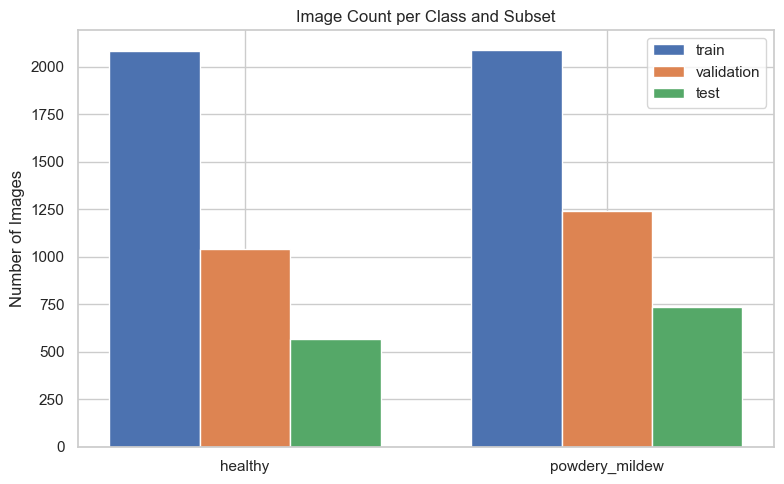

In [5]:
# Count images per class in each subset
image_counts = {subset: {cls: len(list((base_path / subset / cls).glob("*"))) for cls in classes} for subset in subsets}

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
for i, subset in enumerate(subsets):
    values = list(image_counts[subset].values())
    ax.bar([x + i * bar_width for x in range(len(classes))], values, width=bar_width, label=subset)

ax.set_xticks([r + bar_width for r in range(len(classes))])
ax.set_xticklabels(classes)
ax.set_ylabel("Number of Images")
ax.set_title("Image Count per Class and Subset")
ax.legend()
plt.tight_layout()
plt.savefig("../outputs/plots/class_counts.png")
plt.show()

### Image Dimension Distribution by Class

The scatterplot below visualizes the width and height of training images, color-coded by class (`healthy` vs `powdery_mildew`).

This plot helps us:
- Identify any anomalies or size inconsistencies
- Verify whether the images are roughly square-shaped
- Understand the typical dimensions used during preprocessing

Dashed lines indicate the average width and height across the dataset.

**📌 Insight:** Confirms that images are roughly consistent in size and that there are no outliers or corrupted entries.

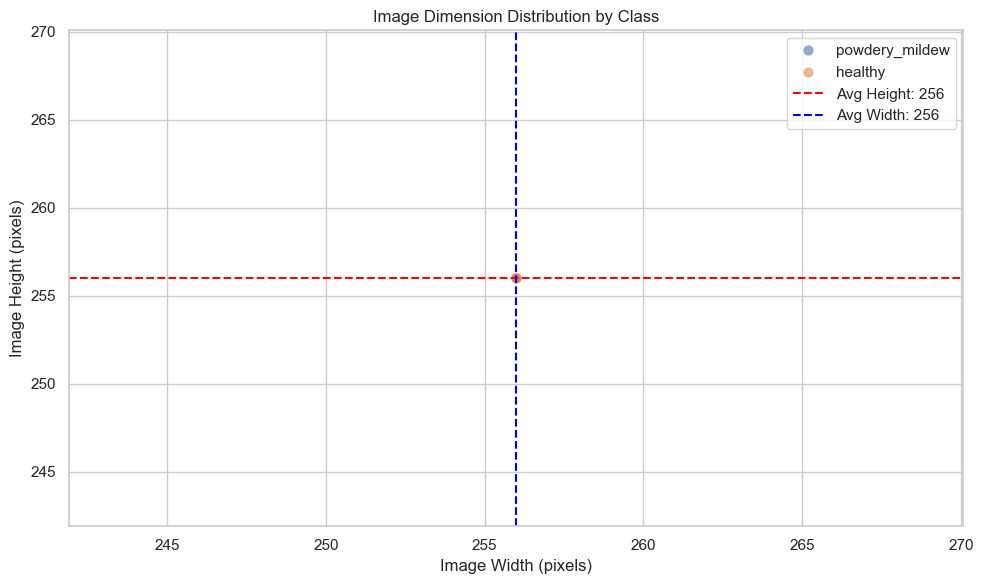

Average Width: 256 px, Average Height: 256 px


In [6]:
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Prepare lists
dim1, dim2, labels_list = [], [], []

train_path = base_path / 'train'
labels = [d.name for d in train_path.iterdir() if d.is_dir()]

# Collect dimensions and labels
for label in labels:
    for image_filename in os.listdir(train_path / label):
        img_path = train_path / label / image_filename
        try:
            img = imread(img_path)
            d1, d2 = img.shape[:2]  # height, width
            dim1.append(d1)
            dim2.append(d2)
            labels_list.append(label)
        except Exception as e:
            print(f"Skipped: {img_path}, Reason: {e}")

# Convert to array
dim1 = np.array(dim1)
dim2 = np.array(dim2)

# Calculate averages
avg_height = int(dim1.mean())
avg_width = int(dim2.mean())

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatterplot with hue by label
sns.scatterplot(
    x=dim2, y=dim1, hue=labels_list,
    alpha=0.6, s=60, edgecolor="w", linewidth=0.5
)

# Average lines
plt.axhline(avg_height, color='red', linestyle='--', label=f'Avg Height: {avg_height}')
plt.axvline(avg_width, color='blue', linestyle='--', label=f'Avg Width: {avg_width}')

# Labels and styling
plt.xlabel("Image Width (pixels)")
plt.ylabel("Image Height (pixels)")
plt.title("Image Dimension Distribution by Class")
plt.legend()
plt.tight_layout()

# Save for dashboard
plt.savefig("../outputs/plots/image_dimension_scatter.png", bbox_inches='tight', dpi=150)
plt.show()

print(f"Average Width: {avg_width} px, Average Height: {avg_height} px")


### Sample Images per Class (Image Grid)
A grid of sample images from each class was generated to help:
 - Visually verify the quality of the data.
 - Observe visual differences between healthy and infected leaves

**📌 Insight:** Powdery mildew appears visually as light-colored patches, validating that a computer vision model can distinguish them.

Saved grid to ../outputs/plots/healthy_samples_grid.png


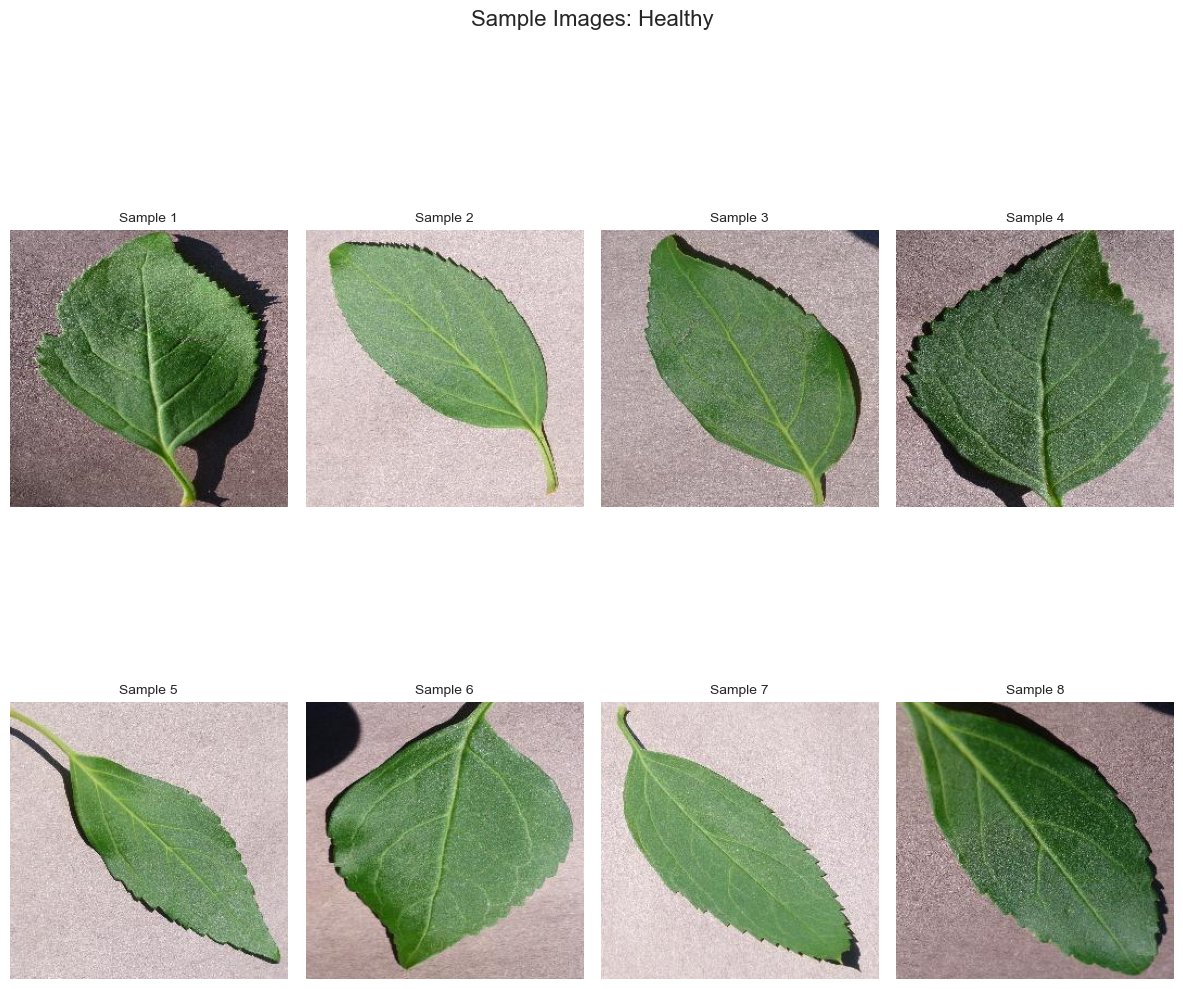

Saved grid to ../outputs/plots/powdery_mildew_samples_grid.png


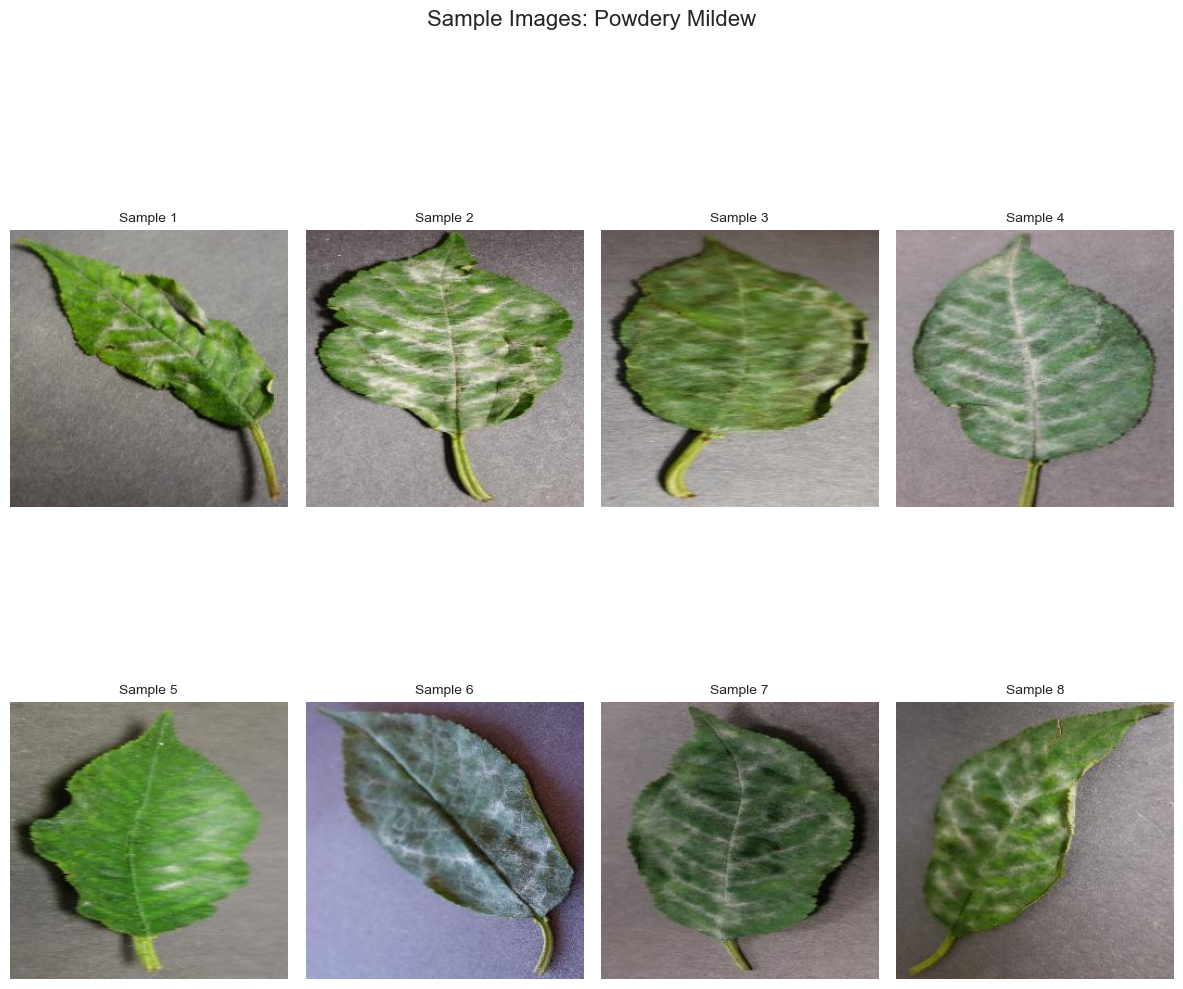

Sample grids generated and saved to outputs/plots folder


In [10]:
# Display a 3x3 grid of sample images per class from train set
def plot_image_grid(label, num_images=8, save_path=None):
    """
    Display a 3x3 grid of sample images per class from train set
    Args:
        label: 'healthy' or 'powdery_mildew'
        num_images: number of images to display (default 9 for 3x3 grid)
        save_path: path to save the plot (optional)
    """
    img_dir = base_path / "train" / label
    images = list(img_dir.glob("*"))
    
    if len(images) < num_images:
        print(f"Warning: Only {len(images)} images available for {label}")
        num_images = len(images)
    
    sample_imgs = random.sample(images, num_images)
    
    # Calculate grid dimensions
    rows = int(np.sqrt(num_images))
    cols = int(np.ceil(num_images / rows))
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.suptitle(f"Sample Images: {label.replace('_', ' ').title()}", fontsize=16)
    
    # Handle single row case
    if rows == 1:
        axes = [axes] if cols == 1 else axes
    
    for idx, (img_path, ax) in enumerate(zip(sample_imgs, axes.flatten())):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Sample {idx+1}", fontsize=10)
    
    # Hide extra subplots
    for idx in range(num_images, len(axes.flatten())):
        axes.flatten()[idx].axis('off')
    
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved grid to {save_path}")
    
    plt.show()

# Generate and save the grids for dashboard
output_dir = Path("../outputs/plots/")
output_dir.mkdir(exist_ok=True)

# Generate grids for both classes
for cls in classes:
    save_file = output_dir / f"{cls}_samples_grid.png"
    plot_image_grid(cls, save_path=save_file)

print("Sample grids generated and saved to outputs/plots folder")

### Average Image per Class
We computed and visualized the average image for each class by resizing all images to a fixed dimension and averaging their pixel values.

**📌 Insight:** Healthy leaves appear darker and more uniform, while infected leaves show visible discoloration.

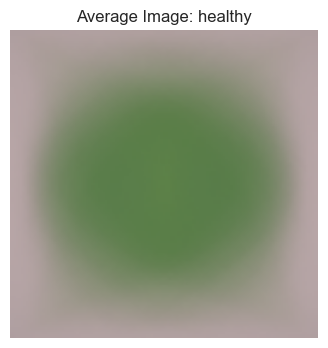

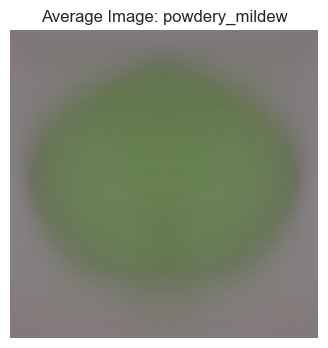

In [11]:
# Compute and plot the average image per class
def compute_average_image(label):
    img_dir = base_path / "train" / label
    images = list(img_dir.glob("*"))
    imgs = []
    for img_path in images:
        try:
            img = Image.open(img_path).resize((128, 128)).convert("RGB")
            imgs.append(np.array(img))
        except:
            continue
    return np.mean(imgs, axis=0).astype(np.uint8)

# Compute average images
avg_healthy = compute_average_image("healthy")
avg_mildew = compute_average_image("powdery_mildew")

# Save healthy average image
plt.figure(figsize=(4, 4))
plt.imshow(avg_healthy)
plt.title(f"Average Image: healthy")
plt.axis("off")
plt.savefig("../outputs/plots/avg_healthy.png", bbox_inches='tight', dpi=150)
plt.show()

# Save mildew average image  
plt.figure(figsize=(4, 4))
plt.imshow(avg_mildew)
plt.title(f"Average Image: powdery_mildew")
plt.axis("off")
plt.savefig("../outputs/plots/avg_mildew.png", bbox_inches='tight', dpi=150)
plt.show()



### Absolute Difference Between Class Averages
A final visualization computes and displays the absolute pixel-wise difference between the average images of the two classes.

**📌 Insight:** Highlights the regions that vary most between healthy and infected leaves — supporting the feasibility of image classification.

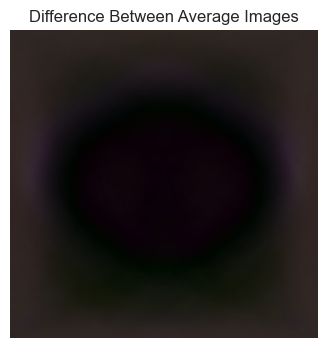

In [12]:
# Plot and save the absolute difference between average images
avg_healthy = compute_average_image("healthy")
avg_mildew = compute_average_image("powdery_mildew")

diff = np.abs(avg_healthy.astype(int) - avg_mildew.astype(int)).astype(np.uint8)
plt.figure(figsize=(4, 4))
plt.imshow(diff)
plt.title("Difference Between Average Images")
plt.axis("off")
plt.savefig("../outputs/plots/abs_diff.png", bbox_inches='tight', dpi=150)
plt.show()

### 📦 Output Files for Dashboard Integration
Several visualizations are saved to the outputs/ directory for use in the Streamlit dashboard:
 - healthy_samples_grid.png
 - powdery_mildew_samples_grid.png
 - avg_healthy.png
 - avg_mildew.png
 - abs_diff.png
 - image_dimension_scatter.png

These files can be embedded in the dashboard directly using st.image(...) for performance and consistency.

